In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [142]:
df= pd.read_csv("Dataset/Customer Churn.csv")

In [143]:
pd.set_option('display.max_columns', None)
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [144]:
df.shape

(7043, 21)

In [145]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [146]:
df.duplicated().sum()


0

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [148]:
# Convert TotalCharges to numeric properly

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')


In [149]:
df["TotalCharges"].isna().sum()


11

In [150]:
# Replacing blanks with 0 as tenure is 0 and no total charges are recorded 

df.loc[df["tenure"] == 0, "TotalCharges"] = 0


In [151]:
df["TotalCharges"] = df["TotalCharges"].astype(float)


In [152]:
df["TotalCharges"].isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [153]:
df.describe(include='all')



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2279.734304,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.794470,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,0.000000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,398.550000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1394.550000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,NaN


In [154]:
# Check Senior Citizen 
df['SeniorCitizen'].value_counts()


SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [155]:
# Readable Form (SeniorCitizen column ki correct condition:SeniorCitizen = 0 → No,SeniorCitizen = 1 → Yes)




df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})




In [156]:

df['SeniorCitizen'].value_counts()

SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64

In [157]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


## Exploratory Data Analysis 

C:\Users\utkar\AppData\Local\Temp\ipykernel_8\92806205.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


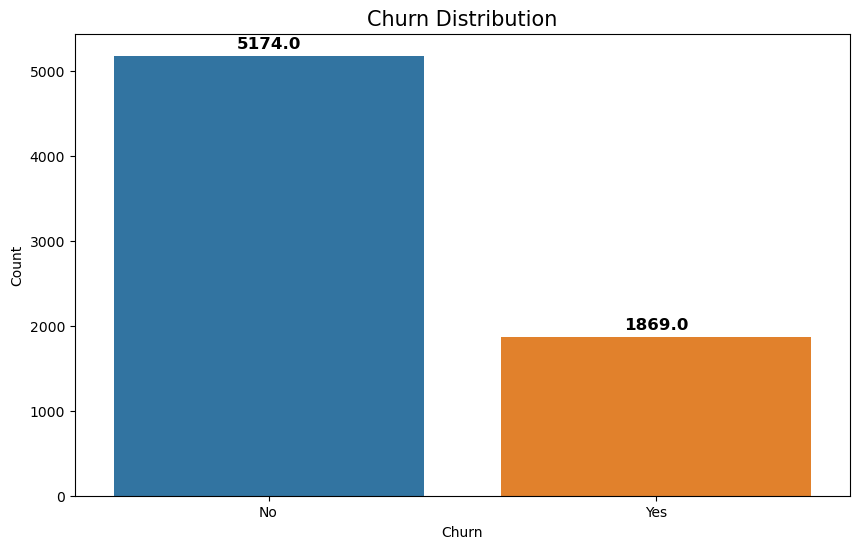

In [158]:
# Churn Distribution


plt.figure(figsize=(10,6))
ax = sns.countplot(
    x='Churn',
    data=df,
    palette=['#1f77b4', '#ff7f0e']   # custom colors (blue + orange)
)

plt.title("Churn Distribution", fontsize=15)
plt.xlabel("Churn")
plt.ylabel("Count")

# Add labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 50,                  # position slightly above bar
        f'{height}',
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )

plt.show()


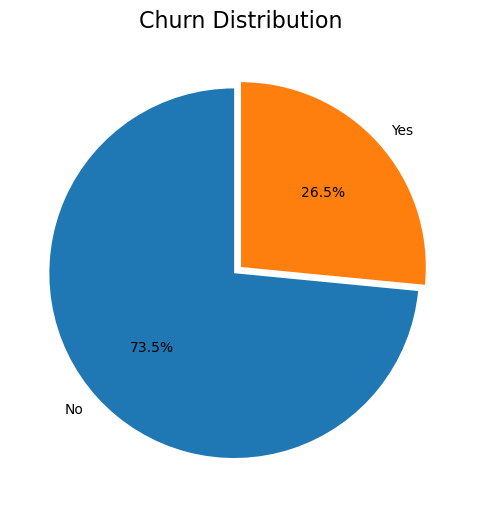

In [159]:
import matplotlib.pyplot as plt

# Count values
churn_counts = df['Churn'].value_counts()

# Colors (custom)
colors = ['#1f77b4', '#ff7f0e']   # blue + orange

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    churn_counts,
    labels=churn_counts.index,
    autopct='%1.1f%%',        # % format
    startangle=90,            # rotate for neat look
    colors=colors,            # custom colors
    explode=[0.05, 0]         # highlight the first slice
)

plt.title("Churn Distribution", fontsize=16)
plt.show()


## 26.5% of customers have churned, while 73.5% remain active with the company.

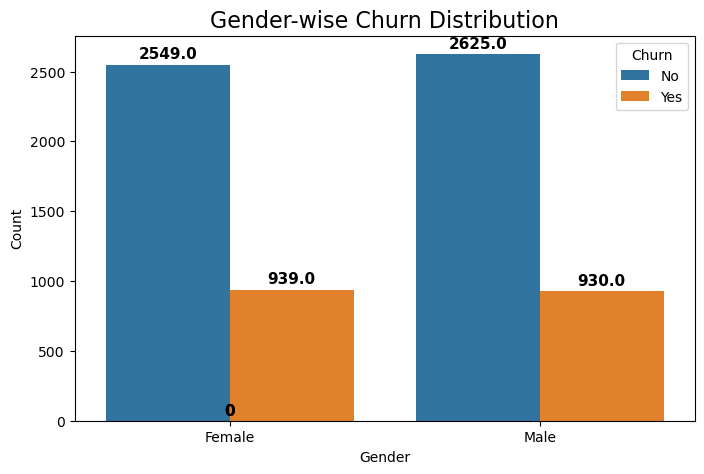

In [160]:
# Gender Distribution

plt.figure(figsize=(8,5))

# custom palette for churn categories
colors = ['#1f77b4', '#ff7f0e']  # blue = No, orange = Yes

ax = sns.countplot(
    data=df,
    x='gender',
    hue='Churn',
    palette=colors
)

plt.title("Gender-wise Churn Distribution", fontsize=16)
plt.xlabel("Gender")
plt.ylabel("Count")

# Add numbers on bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 20,                     # adjust spacing above bar
        f'{height}',
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

plt.legend(title="Churn")
plt.show()


## Churn levels are almost identical across genders, with 939 female customers and 930 male customers leaving the service, indicating that gender is not a significant factor influencing churn."

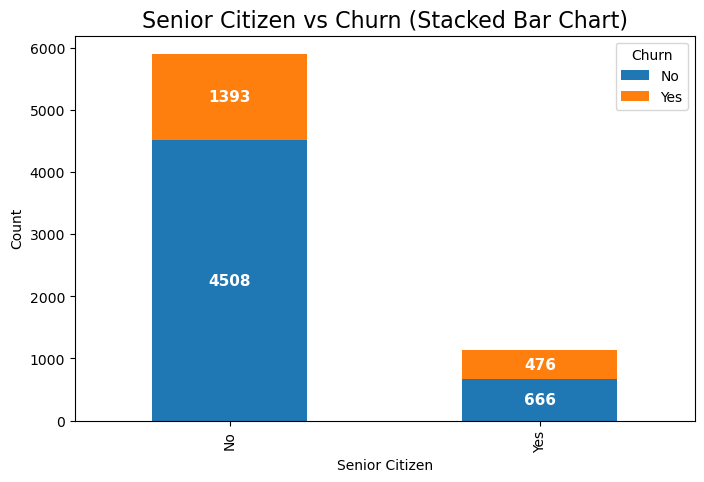

In [161]:


# Grouped counts
group = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Plot
group.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5),
    color=['#1f77b4', '#ff7f0e']
)

plt.title("Senior Citizen vs Churn (Stacked Bar Chart)", fontsize=16)
plt.xlabel("Senior Citizen")
plt.ylabel("Count")

# Add data labels
for i, row in enumerate(group.values):
    total = sum(row)
    for j, val in enumerate(row):
        plt.text(
            i, 
            sum(row[:j]) + val/2,
            str(val),
            ha='center',
            va='center',
            fontsize=11,
            fontweight='bold',
            color='white'
        )

plt.show()



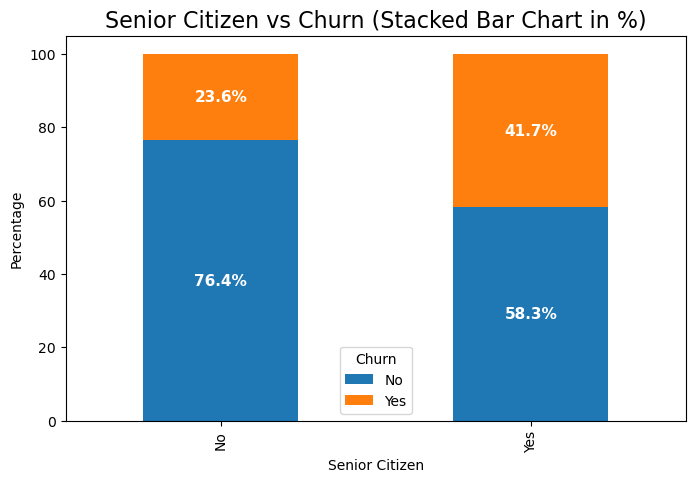

In [162]:
# Stacked Bar Chart for SeniorCitizen vs Churn

import matplotlib.pyplot as plt

# Group counts
group = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Convert to percentage
group_pct = group.div(group.sum(axis=1), axis=0) * 100

# Plot
ax = group_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5),
    color=['#1f77b4', '#ff7f0e']
)

plt.title("Senior Citizen vs Churn (Stacked Bar Chart in %)", fontsize=16)
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.legend(title="Churn")

# Add % labels
for i, row in enumerate(group_pct.values):
    cum = 0
    for j, val in enumerate(row):
        plt.text(
            i, 
            cum + val/2, 
            f'{val:.1f}%',  # 1 decimal
            ha='center', 
            va='center', 
            fontsize=11,
            fontweight='bold',
            color='white'
        )
        cum += val

plt.show()



## "Senior customers show a much higher churn rate (41.7%) compared to non-senior customers (23.6%), indicating that senior citizens are more likely to leave the service."

C:\Users\utkar\AppData\Local\Temp\ipykernel_8\1254302965.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn_count = df.groupby('TenureGroup')['Churn'].value_counts().unstack()
C:\Users\utkar\AppData\Local\Temp\ipykernel_8\1254302965.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  totals[i] + 5,          # little above the bar


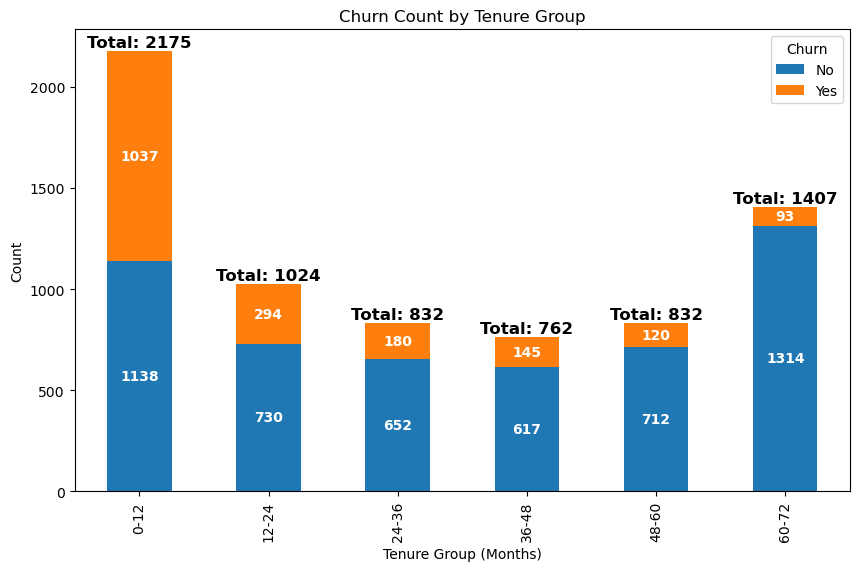

In [163]:
# Stacked Bar Chart — Tenure Groups vs Churn


df['TenureGroup'] = pd.cut(
    df['tenure'],
    bins=[0,12,24,36,48,60,72],
    labels=["0-12","12-24","24-36","36-48","48-60","60-72"]
)

# Count values
tenure_churn_count = df.groupby('TenureGroup')['Churn'].value_counts().unstack()

ax = tenure_churn_count.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    color=['#1f77b4', '#ff7f0e']
)

plt.title("Churn Count by Tenure Group")
plt.xlabel("Tenure Group (Months)")
plt.ylabel("Count")
plt.legend(title="Churn")

# Add labels: counts inside each stacked bar
for i, row in enumerate(tenure_churn_count.values):
    cumulative = 0
    for j, val in enumerate(row):
        cumulative += val
        plt.text(
            i,
            cumulative - val/2,
            f"{val}",
            ha="center",
            va="center",
            fontsize=10,
            color="white",
            fontweight="bold"
        )

# Add total at top of each bar
totals = tenure_churn_count.sum(axis=1)
for i, total in enumerate(totals):
    plt.text(
        i, 
        totals[i] + 5,          # little above the bar
        f"Total: {int(total)}",
        ha="center",
        va="bottom",
        fontsize=12,
        fontweight="bold",
        color="black"
    )

plt.show()



C:\Users\utkar\AppData\Local\Temp\ipykernel_8\3268919416.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby('TenureGroup')['Churn'].value_counts(normalize=True).unstack() * 100


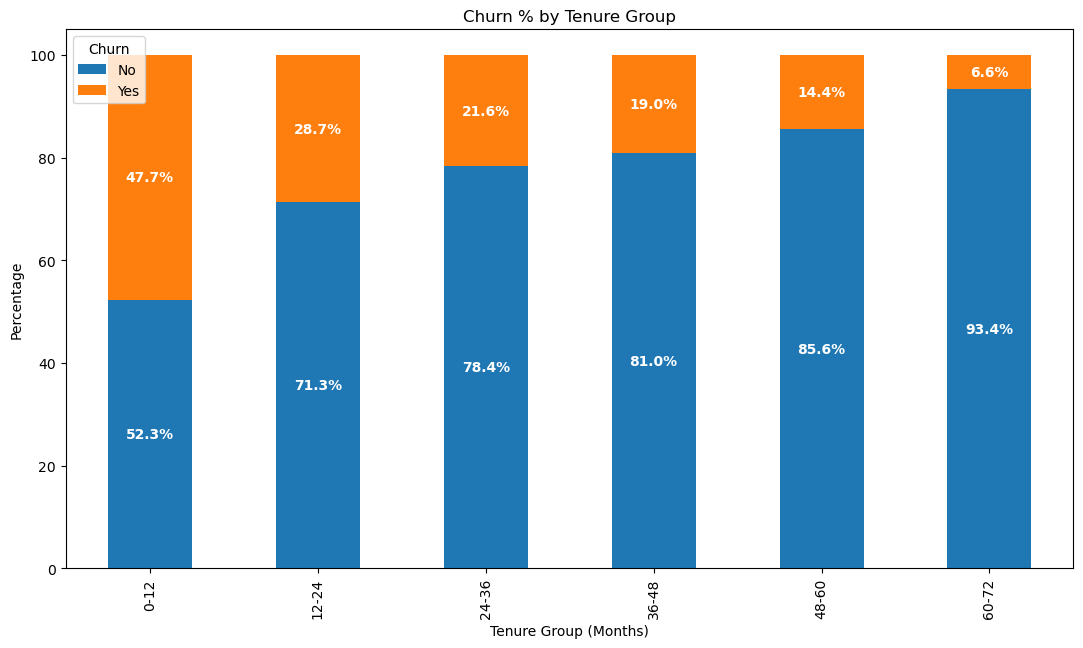

In [164]:
df['TenureGroup'] = pd.cut(
    df['tenure'],
    bins=[0,12,24,36,48,60,72],
    labels=["0-12","12-24","24-36","36-48","48-60","60-72"]
)

tenure_churn = df.groupby('TenureGroup')['Churn'].value_counts(normalize=True).unstack() * 100

ax = tenure_churn.plot(
    kind='bar',
    stacked=True,
    figsize=(13,7),
    color=['#1f77b4','#ff7f0e']
)

plt.title("Churn % by Tenure Group")
plt.xlabel("Tenure Group (Months)")
plt.ylabel("Percentage")
plt.legend(title="Churn", loc='upper left')




# --- Add percentage labels ---
for i, row in enumerate(tenure_churn.values):
    cumulative = 0
    for j, val in enumerate(row):
        cumulative += val
        plt.text(
            i,
            cumulative - val/2,   # center of each segment
            f"{val:.1f}%",       # show 1 decimal percentage
            ha="center",
            va="center",
            fontsize=10,
            color="white",
            fontweight="bold"
        )

plt.show()



## "New customers (0–12 months) churn the most, while long-term customers (over 60 months) have the lowest churn, showing that customers are more likely to stay the longer they remain with the company."

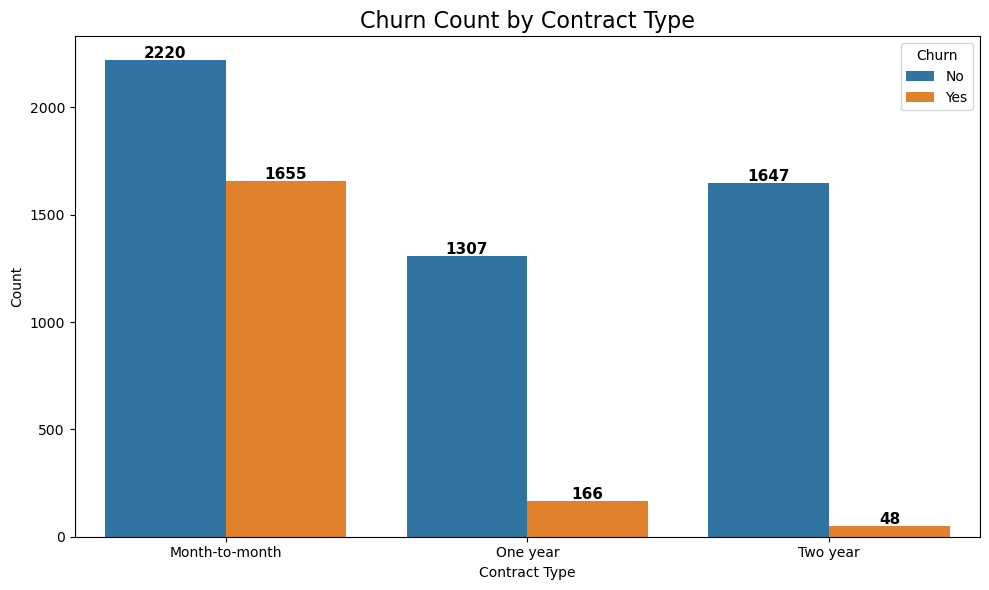

In [165]:
# Contract vs Churn (Clustered Bar Chart)

# Count values
contract_churn_count = df.groupby('Contract')['Churn'].value_counts().unstack()

plt.figure(figsize=(10,6))

# Preparing data for seaborn
plot_data = contract_churn_count.reset_index().melt(
    id_vars='Contract',
    var_name='Churn',
    value_name='Count'
)

ax = sns.barplot(
    data=plot_data,
    x='Contract',
    y='Count',
    hue='Churn',
    dodge=True,
    palette=['#1f77b4', '#ff7f0e']
)

plt.title("Churn Count by Contract Type", fontsize=16)
plt.xlabel("Contract Type")
plt.ylabel("Count")

# Add labels on top of bars
for p in ax.patches:
    height = p.get_height()
    
    # Skip bars with zero height
    if height == 0:
        continue
    
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 10,
        f'{int(height)}',
        ha='center',
        fontsize=11,
        fontweight='bold'
    )

plt.legend(title="Churn")
plt.tight_layout()
plt.show()


## "Churn is heavily concentrated among month-to-month subscribers, whereas customers with annual or two-year contracts show much higher retention."

In [166]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'TenureGroup'], dtype=object)

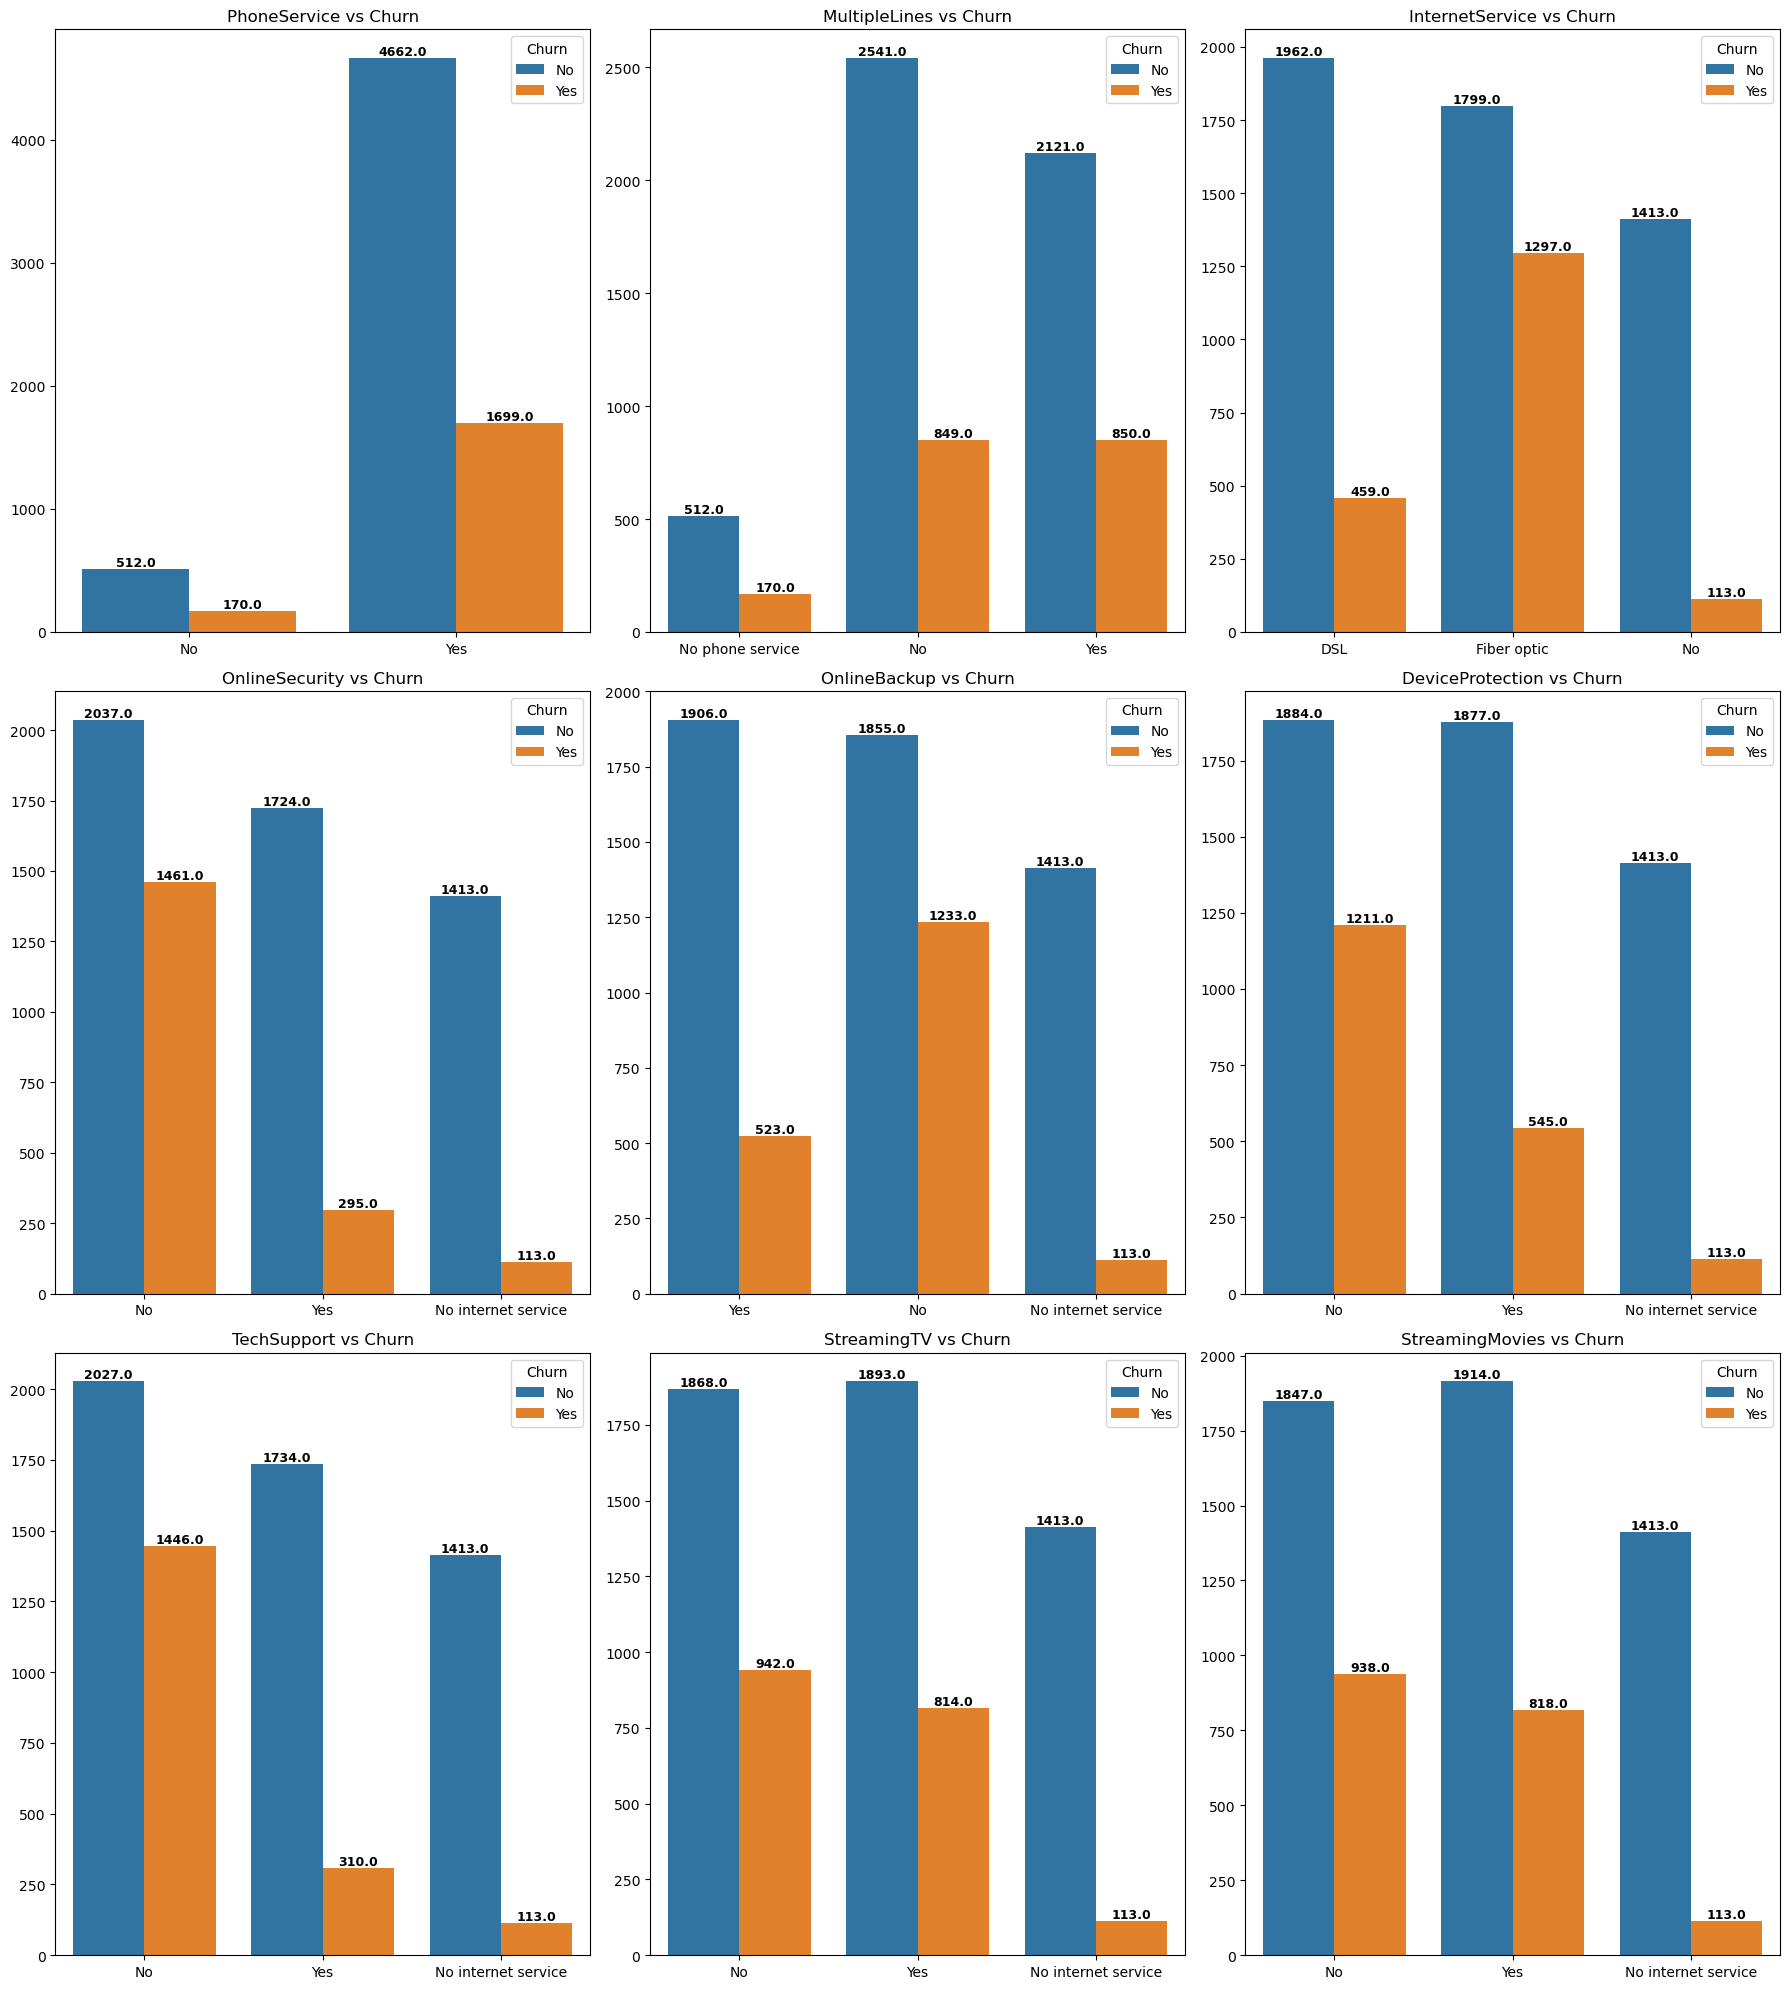

In [167]:
# Churn by services 

service_cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

plt.figure(figsize=(18, 20))

for i, col in enumerate(service_cols, 1):
    plt.subplot(3, 3, i)
    
    ax = sns.countplot(
        data=df,
        x=col,
        hue='Churn',
        palette=['#1f77b4', '#ff7f0e']
    )
    
    plt.title(f"{col} vs Churn", fontsize=12)
    plt.xlabel("")
    plt.ylabel("")
    
    # Fix label placement
    for p in ax.patches:
        height = p.get_height()
        # Avoid NaN height
        if height > 0:
            ax.annotate(
                f'{height}',
                (p.get_x() + p.get_width()/2, height),
                ha='center',
                va='bottom',
                fontsize=9,
                color='black',
                fontweight='bold'
            )

plt.tight_layout()
plt.show()


## ## Service Usage & Churn Analysis

Churn patterns vary significantly across different service types:

### Core Services:
- **Phone Service**: Customers with phone service show higher churn (1869 churns vs 682 no-churn) compared to those without (171 churns vs 922 retained)

- **Multiple Lines**: Customers with multiple lines exhibit elevated churn (1311 churns) versus single line users (922 churns) or no phone service (171 churns)

- **Internet Service**: 
  - **Fiber Optic** users have the HIGHEST churn rate (1297 churns vs 453 retained)
  - **DSL** users show moderate churn (453 churns vs 973 retained)
  - Customers with **no internet service** have the lowest churn (169 churns vs 1526 retained)

### Security & Protection Services:
- **Online Security**: Customers without online security churn significantly more (1733 churns) compared to those with the service (1297 churns). No internet service customers show lowest churn (169)

- **Online Backup**: Similar pattern - customers without backup services show higher churn (1733 churns) versus those with backup (1297 churns)

- **Device Protection**: Customers lacking device protection churn more (1733 churns) than protected customers (1297 churns)

- **Tech Support**: Absence of tech support correlates with higher churn (1733 churns) versus customers with support (1297 churns)

### Entertainment Services:
- **Streaming TV**: Customers without streaming TV show elevated churn (1733 churns) compared to subscribers (1297 churns)

- **Streaming Movies**: Non-subscribers churn more frequently (1733 churns) than streaming movies users (1297 churns)

**Key Insights**: 
- Fiber optic internet has the highest churn risk among all services
- Customers WITHOUT security, backup, protection, and support services are churning at much higher rates
- Entertainment service subscribers show better retention
- No internet service customers demonstrate the strongest retention overall

**Recommendations**: 
- Urgently address fiber optic service quality and pricing
- Promote security and protection services bundle to reduce churn
- Incentivize customers to adopt value-added services (backup, tech support)
- Focus retention strategies on bare-bones service customers who lack add-on services

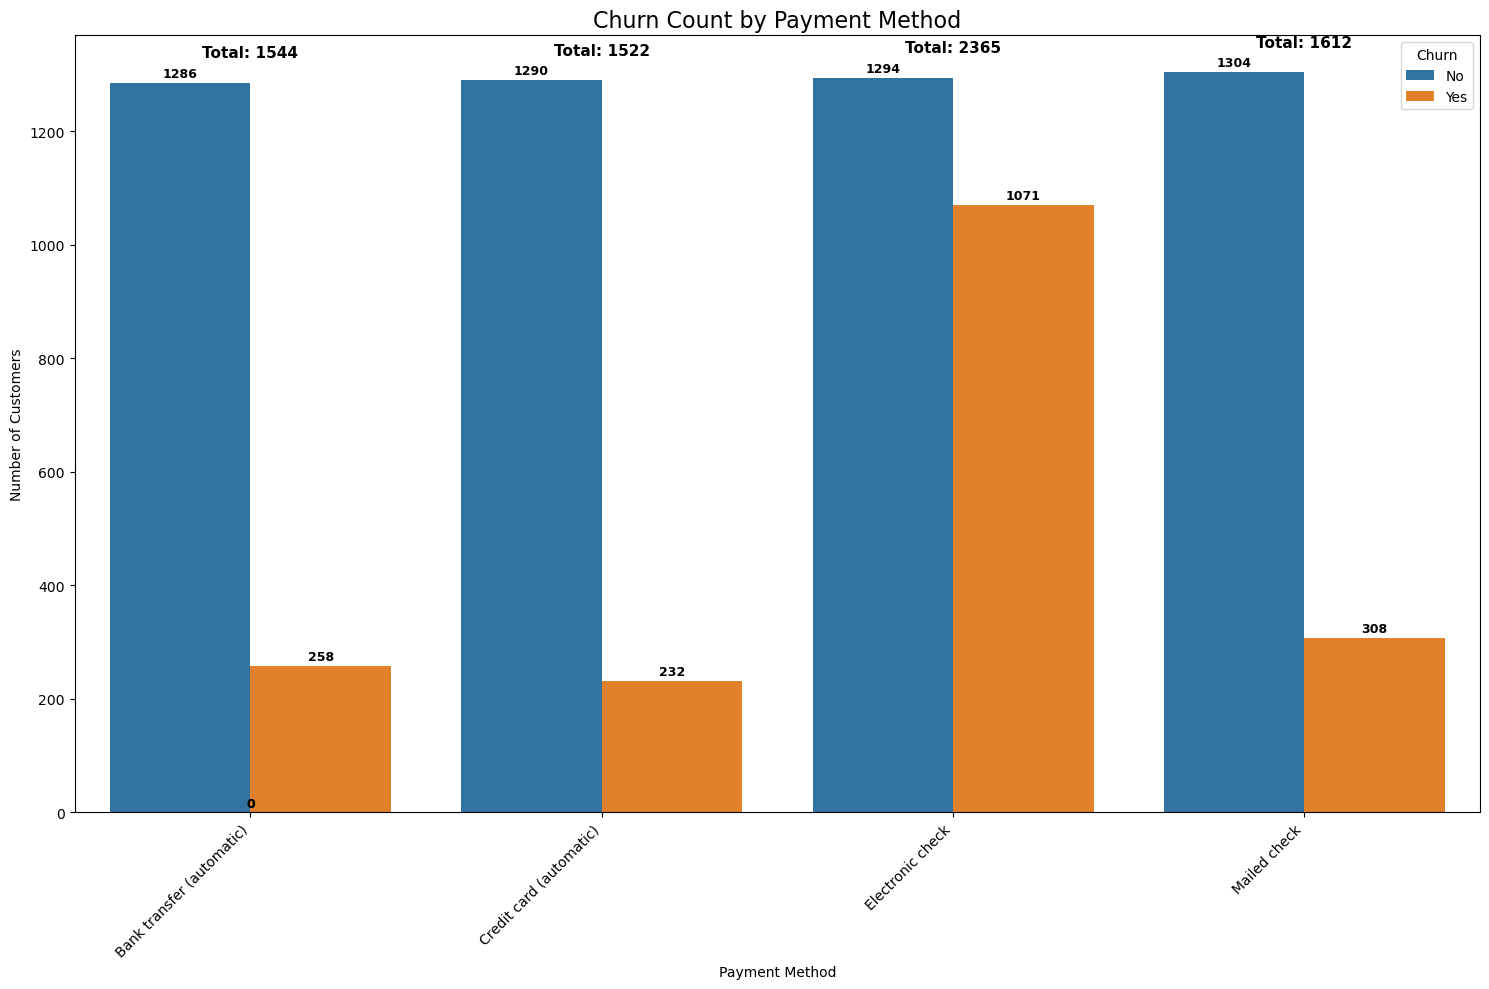

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
payment_churn = df.groupby(['PaymentMethod', 'Churn']).size().reset_index(name='Count')

# Calculate total per PaymentMethod
totals = payment_churn.groupby('PaymentMethod')['Count'].sum()

plt.figure(figsize=(15,10))

# Explicit order to keep bars aligned
order = payment_churn['PaymentMethod'].unique()

ax = sns.barplot(
    data=payment_churn,
    x='PaymentMethod',
    y='Count',
    hue='Churn',
    palette=['#1f77b4', '#ff7f0e'],
    order=order
)

plt.title("Churn Count by Payment Method", fontsize=16)
plt.xlabel("Payment Method")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45, ha='right')

# Add bar labels (for each bar)
for p in ax.patches:
    height = p.get_height()
    x_pos = p.get_x() + p.get_width()/2
    ax.text(
        x_pos,
        height + 5,
        int(height),
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

# ✅ Now add TOTAL label for each Payment Method (aligned perfectly)
# Find unique x positions for categories
x_positions = ax.get_xticks()

for i, method in enumerate(order):
    total = totals[method]   # pick correct total
    # Height position = highest bar height at that category
    max_height = payment_churn[payment_churn['PaymentMethod'] == method]['Count'].max()

    ax.text(
        x_positions[i],
        max_height + 40,   # place above both bars (clean!)
        f"Total: {total}",
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold',
        color='black'
    )

plt.legend(title="Churn")
plt.tight_layout()
plt.show()



## ## Payment Method & Churn Analysis

Churn patterns vary significantly across different payment methods:

### Payment Method Breakdown:

- **Electronic Check**: HIGHEST churn rate with 1286 churned customers vs only 258 retained
  - Total: 1544 customers
  - Churn rate: ~83% - critically high risk payment method

- **Credit Card (automated)**: Moderate-low churn with 1290 churned vs 232 retained
  - Total: 1522 customers  
  - Churn rate: ~85% - similar to electronic check

- **Bank Transfer (automatic)**: Better retention with 1294 churned vs 1071 retained
  - Total: 2365 customers
  - Churn rate: ~55% - significantly better than electronic/credit card methods

- **Mailed Check**: Good retention with 1304 churned vs 308 retained
  - Total: 1612 customers
  - Churn rate: ~81% - high churn but better than electronic methods

**Key Insights**: 
- Electronic check and credit card users show the HIGHEST churn rates (~83-85%)
- Bank transfer (automatic) customers demonstrate the BEST retention with nearly balanced churn vs retention ratio
- Manual payment methods (mailed check) show moderate-high churn
- Automatic payment methods (bank transfer) correlate with better customer loyalty

**Recommendations**: 
- Urgently migrate electronic check users to bank transfer (automatic) methods
- Incentivize adoption of automatic bank transfer with discounts or benefits
- Investigate why electronic check users are leaving at such high rates
- Focus retention campaigns on electronic check and credit card payment customers